## [개념정리]

* 머신러닝 과정
  1) 데이터 가공/변환
  2) 모델 학습/예측
  3) 평가<- 성능평가지표 회귀냐 분류냐
      * 회귀: 실제값과 예측값의 오차 제곱합에 기반
         1) 오차에 절대값을 씌운 뒤 평균 오차
         2) 오차 제곱합에 루트를 씌운 두 평균 오차
      * 분류: 정확도, 오차행렬, 정밀도, 재현율, F1스코어, ROC AUC



### 1. 정확도(Accuracy)
* 정확도=(예측 결과가 동일한 데이터 건수)/(전체 예측 데이터 건수)
* if 이진 분류 -> ML 모델 성능의 왜곡 발생
-> 불균형한 레이블 값 분포에서 ML 모델 성능을 판단할 경우, 적합한 평가 지표가 아님

### 2. 오차행렬
* 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고 있는지도 함께 보여지는 지표
* TN,FP,FN,TP 값을 다양하게 결합해 분류 모델 예측 성능의 오류를 알 수 있음
* TN : True Negative, FP : False Positive, FN : False negative, TP : True Positive
->정확도, 정밀도, 재현도를 알 수 있음
* confusion_matrix() 이용-> ndarray 형태로 출력
* 정확도=예측결과와 실제값이 동일한 건수/전체 데이터 수= (TN+TP)/(TN+FP+FN+TP)

### 3. 정밀도와 재현율
#### 정밀도
* 예측을 Positive로 한 대상 중에 예측값과 실제값이 Positive로 일치한 데이터의 비율
* 정밀도=(TP)/(TP+FP)
* =양성예측도 -> Positive 예측 성능을 정밀하게 측정하기 위한 지표
* 중요지표인 경우 :실제 Negative 음성데이터를 Positive로 잘못 판단하게 되면 업무상 큰 영향이 발생 -> ex) 스펨메일 여부 판단
* precision_score()

#### 재현율
* 실제 값이 Positive로 한 대상 중에 예측값과 실제값이 Positive로 일치한 데이터의 비율
* 정밀도=(TP)/(TP+FN)
* 민감도 or TPR
* 중요지표인 경우: 실제 Positive 양성데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생 -> ex) 암판단모델, 금융사기 적발모델
* recall_score()

* LogisticRegreesion(solver='liblinear'):로지스틱 회귀의 최적화 알고리즘 유형 지정 -> 작은 데이터 세트의 이진분류의 경우
*  solver='libfgs' : 데이터 세트가 상대적으로 크고 다중 분류의 경우

#### 정밀도/재현율 trade=off 
* 정밀도와 재현율은 상호 보완적인 관계를 가짐
* 이진 분류에서 임계값이 0.5로 정하고 기준값보다 확률이 크면 positive, 작으면 negative로 결정
* predict_proba() : 반환결과가 예측확률 결과로 출력됨
* 두 array를 병합할때 concatenate를 이용하기
* 사이킷런의 Binarizer : threshold 값을 기준으로 크면 1, 같거나 작으면 0으로 변환됨.
* if 임계값을 낮추면, 재현율이 높아지고 정밀도는 떨어짐. why? True값이 많아지게 되므로
* precision_recall_curve(y_true=실제 클래스값 배열, probas_pred)-> 정밀도, 재현율

#### 정밀도와 재현율의 맹점
* 정밀도 100% : 확실한 기준이 되는 경우만 Positive 나머지는 모두 Negative로 예측
* 재현율 100% : 모든 환자를 positive로 예측하면 됨.

### 4. F1 스코어
* 정밀도와 재현율을 결합한 지표
* f1_score()이용

### 5. ROC곡선과 AUC
#### ROC 곡선
* False Positive Rate이 변할때 True Positive Rate이 어떻게 변화는지를 나타내는 곡선
* TPR=TP/(FN+TP)=민감도
* TNR=특이성
* FPR=1-특이성
* ROC 곡선이 가운데 직선에 가까울 수록 성능이 떨어지는 것임
* if FPR=FP/(FP+TN)이 0으로 만들려면, 임계값을 1로 지정
* if FPR을 1로 만들려면, TN=0으로 만들기
* roc_curve()이용

#### AUC
* AUC는 ROC 곡선 면적에 기반함
-> 1에 가까울 수록 좋은 수치
* AUC 커지려면 -> FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐에 따라서
____

## [코드필사]

In [112]:
# 사이킷런의 BaseEstimator 클래스를 상속받아, 성별에 따라 생존자를 예측하는 단순한 classifier 생성
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    #fit() 메서드는 아무것도 학습하지 않음
    def fit(self, X, y=None):
        pass
    # predict() 메서드는 단순히 sex 피처가 1이면 0, 그렇지 않으면 1로 예측함.
    def predict(self, X):
        pred=np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i]==1:
                pred[i]=0
            else:
                pred[i]=1

        return pred

In [113]:
# 중간에 warning 사인에 계속 나와서 코드를 추가로 입력했습니다!
import warnings
warnings.filterwarnings(action='ignore')

In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

def format_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le=LabelEncoder()
        le=le.fit(df[feature])
        df[feature]=le.transform(df[feature])
    return df


def transform_features(df):
    df=fillna(df)
    df=drop_features(df)
    df=format_features(df)
    return df


#원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할.
titanic_df=pd.read_csv('./data/titanic_train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived', axis=1)
X_titanic_df=transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가를 수행
myclf=MyDummyClassifier()
myclf.fit(X_train,y_train)

mypredictions=myclf.predict(X_test)
print('Dummy Classifier의 정확도: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도: 0.7877


In [115]:
# MINST데이터 세트를 변환해 불균형한 데이터 세트로 만든 뒤에 정확도 지표 적용시 문제점

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass

    #입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self ,X):
        return np.zeros((len(X),1), dtype=bool)

#사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩
digits=load_digits()

#digits 번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환.
y=(digits.target==7).astype(int)
X_train, X_test, y_train, y_test=train_test_split(digits.data, y, random_state=11)

In [116]:
#불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기:', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

#Dummy Classifier로 학습/예측/정확도 평가
fakeclf=MyFakeClassifier()
fakeclf.fit(X_train,y_train)
fakepred=fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
Name: count, dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


### 2. 오차행렬
* 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고 있는지도 함께 보여지는 지표
* TN,FP,FN,TP 값을 다양하게 결합해 분류 모델 예측 성능의 오류를 알 수 있음
* TN : True Negative, FP : False Positive, FN : False negative, TP : True Positive
->정확도, 정밀도, 재현도를 알 수 있음
* confusion_matrix() 이용-> ndarray 형태로 출력
* 정확도=예측결과와 실제값이 동일한 건수/전체 데이터 수= (TN+TP)/(TN+FP+FN+TP)

In [117]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

### 3. 정밀도와 재현율
#### 정밀도
* 예측을 Positive로 한 대상 중에 예측값과 실제값이 Positive로 일치한 데이터의 비율
* 정밀도=(TP)/(TP+FP)
* =양성예측도 -> Positive 예측 성능을 정밀하게 측정하기 위한 지표
* 중요지표인 경우 :실제 Negative 음성데이터를 Positive로 잘못 판단하게 되면 업무상 큰 영향이 발생 -> ex) 스펨메일 여부 판단
* precision_score()

#### 재현율
* 실제 값이 Positive로 한 대상 중에 예측값과 실제값이 Positive로 일치한 데이터의 비율
* 정밀도=(TP)/(TP+FN)
* 민감도 or TPR
* 중요지표인 경우: 실제 Positive 양성데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생 -> ex) 암판단모델, 금융사기 적발모델
* recall_score()

* LogisticRegreesion(solver='liblinear'):로지스틱 회귀의 최적화 알고리즘 유형 지정 -> 작은 데이터 세트의 이진분류의 경우
*  solver='libfgs' : 데이터 세트가 상대적으로 크고 다중 분류의 경우

In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion=confusion_matrix(y_test, pred)
    accuracy=accuracy_score(y_test, pred)
    precision=precision_score(y_test, pred)
    recall=recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율{2:.4f}'.format(accuracy, precision, recall))

In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#원본데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df=pd.read_csv('./data/titanic_train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived', axis=1)
X_titanic_df=transform_features(X_titanic_df)

X_train,X_test,y_train,y_test=train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)
lr_clf=LogisticRegression(solver='liblinear')

lr_clf.fit(X_train,y_train)
pred=lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬
[[108  10]
 [ 14  47]]
정확도:0.8659, 정밀도:0.8246, 재현율0.7705


#### 정밀도/재현율 trade=off 
* 정밀도와 재현율은 상호 보완적인 관계를 가짐
* 이진 분류에서 임계값이 0.5로 정하고 기준값보다 확률이 크면 positive, 작으면 negative로 결정
* predict_proba() : 반환결과가 예측확률 결과로 출력됨
* 두 array를 병합할때 concatenate를 이용하기
* 사이킷런의 Binarizer : threshold 값을 기준으로 크면 1, 같거나 작으면 0으로 변환됨.
* if 임계값을 낮추면, 재현율이 높아지고 정밀도는 떨어짐. why? True값이 많아지게 되므로
* precision_recall_curve(y_true=실제 클래스값 배열, probas_pred)-> 정밀도, 재현율

#### 정밀도와 재현율의 맹점
* 정밀도 100% : 확실한 기준이 되는 경우만 Positive 나머지는 모두 Negative로 예측
* 재현율 100% : 모든 환자를 positive로 예측하면 됨.

In [120]:
pred_proba=lr_clf.predict_proba(X_test)
pred=lr_clf.predict(X_test)
print('pred_proba()결과 Shape:{0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출\n:', pred_proba[:3])

#예측 확률 array와 예측 결과값 array를 병합해 예측 확률과 결과값을 한눈에 확인
pred_proba_result=np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측\n',pred_proba_result[:3])

pred_proba()결과 Shape:(179, 2)
pred_proba array에서 앞 3개만 샘플로 추출
: [[0.44935227 0.55064773]
 [0.86335512 0.13664488]
 [0.86429645 0.13570355]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측
 [[0.44935227 0.55064773 1.        ]
 [0.86335512 0.13664488 0.        ]
 [0.86429645 0.13570355 0.        ]]


In [121]:
from sklearn.preprocessing import Binarizer

X=[[1,-1,2],[2,0,0],[0,1.1,1.2]]

#X의 개별 원소들이 threshold값보다 같거나 작으면 0을, 크면 1을 반환
binarizer=Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [122]:
from sklearn.preprocessing import Binarizer
#Binarizer의 threshold 설정값
custom_threshold=0.5

#predict_proba() 반환값의 두 번째 칼럼, 즉 positive 클래스 칼럼 하나만 추출해 Binarizer을 적용
pred_proba_1=pred_proba[:,1].reshape(-1,1)

binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict=binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)



오차행렬
[[108  10]
 [ 14  47]]
정확도:0.8659, 정밀도:0.8246, 재현율0.7705


In [123]:
#Binarizer의 threshold 설정값을 0.4로 설정
custom_threshold=0.4

#predict_proba() 반환값의 두 번째 칼럼, 즉 positive 클래스 칼럼 하나만 추출해 Binarizer을 적용
pred_proba_1=pred_proba[:,1].reshape(-1,1)

binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict=binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)



오차행렬
[[97 21]
 [11 50]]
정확도:0.8212, 정밀도:0.7042, 재현율0.8197


In [124]:
#테스트를 수행할 모든 임계값을 리스트 객체로 저장.
thresholds=[0.4,0.45,0.5,0.55,0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    #thresholds list 객체 내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict=binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1),thresholds)

임곗값: 0.4
오차행렬
[[97 21]
 [11 50]]
정확도:0.8212, 정밀도:0.7042, 재현율0.8197
임곗값: 0.45
오차행렬
[[105  13]
 [ 13  48]]
정확도:0.8547, 정밀도:0.7869, 재현율0.7869
임곗값: 0.5
오차행렬
[[108  10]
 [ 14  47]]
정확도:0.8659, 정밀도:0.8246, 재현율0.7705
임곗값: 0.55
오차행렬
[[111   7]
 [ 16  45]]
정확도:0.8715, 정밀도:0.8654, 재현율0.7377
임곗값: 0.6
오차행렬
[[113   5]
 [ 17  44]]
정확도:0.8771, 정밀도:0.8980, 재현율0.7213


In [125]:
from sklearn.metrics import precision_recall_curve

#레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]

#실제값 데이터 세트와 레이블 값이 1일때의 예측확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임계값 배열의 Shape:', thresholds.shape)

#반환된 임계값 배열 로우가 147건이므로 샘플 10건만 추출하되, 임계값을 15step으로 추출.
thr_index=np.arange(0, thresholds.shape[0],15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곘값:', np.round(thresholds[thr_index],2))

# 15step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임곗값별 정밀도:', np.round(precisions[thr_index],3))
print('샘플 임계값별 재현율:', np.round(recalls[thr_index],3))

반환된 분류 결정 임계값 배열의 Shape: (165,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135 150]
샘플용 10개의 임곘값: [0.02 0.11 0.13 0.14 0.16 0.24 0.32 0.45 0.62 0.73 0.87]
샘플 임곗값별 정밀도: [0.341 0.372 0.401 0.44  0.505 0.598 0.688 0.774 0.915 0.968 0.938]
샘플 임계값별 재현율: [1.    1.    0.967 0.902 0.902 0.902 0.869 0.787 0.705 0.492 0.246]


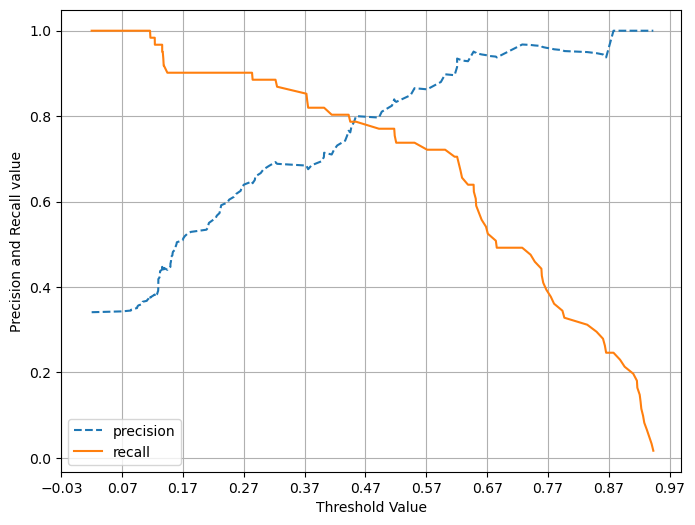

In [126]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds=precision_recall_curve(y_test, pred_proba_c1)

    #X축을 threshold 값으로 Y축은 정밀도, 재현율 순으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary=thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    #threshold 값 x축의 Scale을 0.1 단위로 변경
    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))

    #x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

### 4. F1 스코어
* 정밀도와 재현율을 결합한 지표
* f1_score()이용

In [127]:
from sklearn.metrics import f1_score
f1=f1_score(y_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7966


In [128]:
def get_clf_eval(y_test, pred):
    confusion=confusion_matrix(y_test, pred)
    accuracy=accuracy_score(y_test, pred)
    precision=precision_score(y_test, pred)
    recall=recall_score(y_test, pred)
    #F1 스코어 추가
    f1=f1_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    #f1 score print 추가
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율{2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall,f1))

thresholds=[0.4,0.45,0.5,0.55,0.6]
pred_proba=lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차행렬
[[97 21]
 [11 50]]
정확도:0.8212, 정밀도:0.7042, 재현율0.8197, F1:0.7576
임곗값: 0.45
오차행렬
[[105  13]
 [ 13  48]]
정확도:0.8547, 정밀도:0.7869, 재현율0.7869, F1:0.7869
임곗값: 0.5
오차행렬
[[108  10]
 [ 14  47]]
정확도:0.8659, 정밀도:0.8246, 재현율0.7705, F1:0.7966
임곗값: 0.55
오차행렬
[[111   7]
 [ 16  45]]
정확도:0.8715, 정밀도:0.8654, 재현율0.7377, F1:0.7965
임곗값: 0.6
오차행렬
[[113   5]
 [ 17  44]]
정확도:0.8771, 정밀도:0.8980, 재현율0.7213, F1:0.8000


In [129]:
from sklearn.metrics import roc_curve

#레이블 값이 1일때의 예측활률을 추출
pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds=roc_curve(y_test, pred_proba_class1)

#반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임계값을 5step으로 추출
#thresholds[0]은 max+1로 임의로 설정. 이외를 제외하기 위해 np.arange는 1부터 시작
thr_index=np.arange(1, thresholds.shape[0], 5)

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값:',np.round(thresholds[thr_index],2))

# 5step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR:', np.round(fprs[thr_index],3))
print('샘플 임곗값별 TPR:', np.round(tprs[thr_index],3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임곗값: [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR: [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임곗값별 TPR: [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


### 5. ROC곡선과 AUC
*ROC 곡선: False Positive Rate이 변할때 True Positive Rate이 어떻게 변화는지를 나타내는 곡선

-> TPR=TP/(FN+TP)=민감도

-> TNR=특이성

-> FPR=1-특이성

* ROC 곡선이 가운데 직선에 가까울 수록 성능이 떨어지는 것임
* if FPR=FP/(FP+TN)이 0으로 만들려면, 임계값을 1로 지정
* if FPR을 1로 만들려면, TN=0으로 만들기
* roc_curve()이용


* AUC는 ROC 곡선 면적에 기반함
-> 1에 가까울 수록 좋은 수치
* AUC 커지려면 -> FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐에 따라서

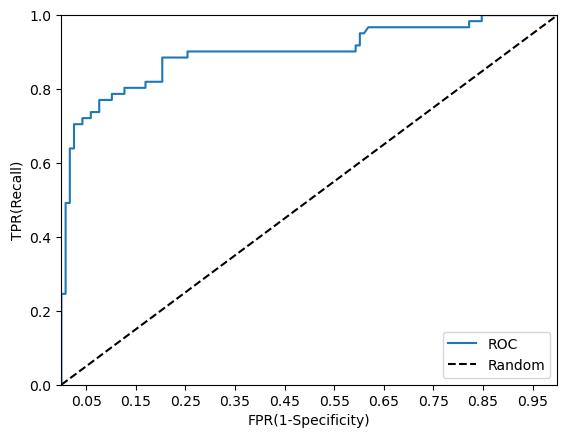

In [130]:
def roc_curve_plot(y_test, pred_proba_c1):
    #임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds= roc_curve(y_test, pred_proba_c1)
    #ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    #가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1],'k--', label='Random')

    #FPR x축의 scale을 0.1로 변경, X축,Y축명 설정 등
    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR(1-Specificity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()

roc_curve_plot(y_test, pred_proba[:,1])

In [131]:
from sklearn.metrics import roc_auc_score

pred_proba=lr_clf.predict_proba(X_test)[:,1]
roc_score=roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.8987


In [147]:
def get_clf_eval(y_test, pred, pred_proba):
    confusion=confusion_matrix(y_test, pred)
    accuracy=accuracy_score(y_test, pred)
    precision=precision_score(y_test, pred)
    recall=recall_score(y_test, pred)
    f1=f1_score(y_test, pred)
    #ROC-AUC 추가
    roc_auc=roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    #ROC-AUC print 추가
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율{2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall,f1,roc_auc))

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data=pd.read_csv('./data/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [134]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [135]:
#피처 데이터 세트 X, 레이블 데이터 세트 y를 추출
#맨끝이 otutcome 칼럼으로 레이블임. 칼럼의 위치 -1을 이용해 추출
X=diabetes_data.iloc[:,:-1]
y=diabetes_data.iloc[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=156, stratify=y)

#로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf=LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred=lr_clf.predict(X_test)
pred_proba=lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[87 13]
 [22 32]]
정확도:0.7727, 정밀도:0.7111, 재현율0.5926, F1:0.6465, AUC:0.8083


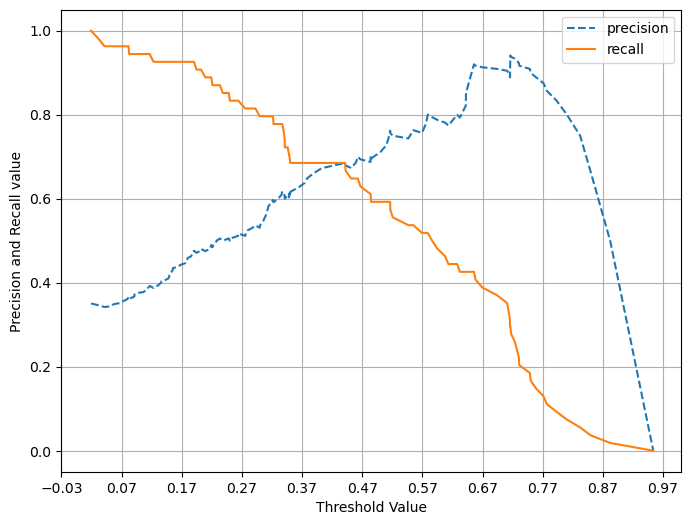

In [136]:
pred_proba_c1=lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [137]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


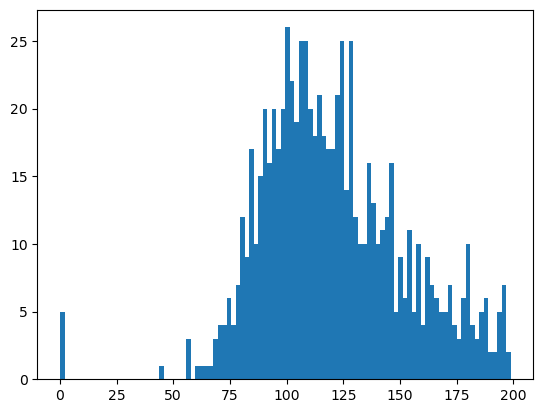

In [138]:
plt.hist(diabetes_data['Glucose'],bins=100)
plt.show()

In [139]:
#0값을 검사할 피처명 리스트
zero_features=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

#전체 데이터 건수
total_count=diabetes_data['Glucose'].count()

#피처별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고, 퍼센트 계싼
for feature in zero_features:
    zero_count=diabetes_data[diabetes_data[feature]==0][feature].count()
    print('{0}0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_count, 100*zero_count/total_count))

Glucose0 건수는 5, 퍼센트는 0.65%
BloodPressure0 건수는 35, 퍼센트는 4.56%
SkinThickness0 건수는 227, 퍼센트는 29.56%
Insulin0 건수는 374, 퍼센트는 48.70%
BMI0 건수는 11, 퍼센트는 1.43%


In [140]:
#zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균값으로 대체
mean_zero_features=diabetes_data[zero_features].mean()
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0, mean_zero_features)

In [141]:
X=diabetes_data.iloc[:,:-1]
y=diabetes_data.iloc[:,-1]

#StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify=y)

#로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf=LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred=lr_clf.predict(X_test)
pred_proba=lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[90 10]
 [21 33]]
정확도:0.7987, 정밀도:0.7674, 재현율0.6111, F1:0.6804, AUC:0.8433


In [148]:
# get_eval_by_threshold 함수 수정
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict, pred_proba_c1)

thresholds=[0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.5]
pred_proba=lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.3
오차행렬
[[65 35]
 [11 43]]
정확도:0.7013, 정밀도:0.5513, 재현율0.7963, F1:0.6515, AUC:0.8433
임곗값: 0.33
오차행렬
[[71 29]
 [11 43]]
정확도:0.7403, 정밀도:0.5972, 재현율0.7963, F1:0.6825, AUC:0.8433
임곗값: 0.36
오차행렬
[[76 24]
 [15 39]]
정확도:0.7468, 정밀도:0.6190, 재현율0.7222, F1:0.6667, AUC:0.8433
임곗값: 0.39
오차행렬
[[78 22]
 [16 38]]
정확도:0.7532, 정밀도:0.6333, 재현율0.7037, F1:0.6667, AUC:0.8433
임곗값: 0.42
오차행렬
[[84 16]
 [18 36]]
정확도:0.7792, 정밀도:0.6923, 재현율0.6667, F1:0.6792, AUC:0.8433
임곗값: 0.45
오차행렬
[[85 15]
 [18 36]]
정확도:0.7857, 정밀도:0.7059, 재현율0.6667, F1:0.6857, AUC:0.8433
임곗값: 0.48
오차행렬
[[88 12]
 [19 35]]
정확도:0.7987, 정밀도:0.7447, 재현율0.6481, F1:0.6931, AUC:0.8433
임곗값: 0.5
오차행렬
[[90 10]
 [21 33]]
정확도:0.7987, 정밀도:0.7674, 재현율0.6111, F1:0.6804, AUC:0.8433


In [143]:
# 임계값을 0.48로 설정한 Binarizer 설정
binarizer=Binarizer(threshold=0.48)

#위에서 구한 lr_clf의 predict_proba() 예측확률 array에서 1에 해당하는 칼럼값을 Binarizer 변환
pred_th_048=binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

get_clf_eval(y_test, pred_th_048, pred_proba[:,1])

오차행렬
[[88 12]
 [19 35]]
정확도:0.7987, 정밀도:0.7447, 재현율0.6481, F1:0.6931, AUC:0.8433
